In [9]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import plotly as py
from shapely.geometry import Point, Polygon
import plotly.express as px
import requests
import json

%matplotlib inline

Paris is hosting the Paralympics in 2024. One of the events at the Paralympics is an open water
swimming event in the Seine (apparently the water is clean or so the French say). Since the City
of Amsterdam thinks it is beter than Paris, they want to host an event before the Paralympics,
snubbing the Parisians. The idea is to host a 5km. open water swimming event through the
canals of Amsterdam. You are asked by the municipality of Amsterdam to advise on the
feasibility of the event from the perspecptive of the safety of the partaking athletes from an
environmental perspective. The event is going to be hosted in May.

For this exercise you have chosen a route in Amsterdam for the canal swimming event.
Preferably you have this route calculated using Python. You can set a start point and an end
point and then try to find a route that has a certain distance (min. 5 km.)

The Municipality wants you to find a location for the Event Headquarters. They decided it
would be best if this E.H. is as close to the centre of the swimming route. There is a bit of a
concern for the after party and the stream of visitors. They want you to quantify the number of
visitors that can reach the event and the capacity for festivities after the event

Location of swimming route is calculated based on previous findings

In [21]:
city_name = "Amsterdam"

water = ox.geometries.geometries_from_place( city_name, tags={'natural' : 'water'})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30632\240874422.py:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  water = ox.geometries.geometries_from_place( city_name, tags={'natural' : 'water'})


In [11]:
url_zwem = "https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=ZWEMWATER&THEMA=zwemwater"
response_zwem = requests.get(url_zwem)
gdf_zwem = gpd.read_file(response_zwem.text)

In [26]:
gdf_boat = gpd.read_file("Amsterdam_canal_routes.geojson")

In [22]:
"""df_zwemwater =  pd.read_csv("ZWEMWATER.csv", sep = ";")
gdf_zwemwater = gpd.GeoDataFrame(df_zwemwater[['OBJECTNUMMER', "LNG", "LAT", "Categorie"]],
    geometry=gpd.points_from_xy(df_zwemwater.LAT, df_zwemwater.LNG), crs="WGS84")
df_zwemplek = gdf_zwemwater[gdf_zwemwater['Categorie']=="zwemplek"]"""

In [28]:
fig, ax = plt.subplots(figsize=(200,200))
ax.set_aspect('equal')
ax.set_facecolor('#D3D3D3')

water.plot(ax=ax, color="#ffffff")
gdf_zwem.plot(ax=ax, marker = 'o', markersize = 1500, color="#FFC300")
gdf_boat.plot(ax=ax, color= "#D22B2B")

plt.savefig("waterways_amsterdam.png")

Find the centre of the nodes of the swimming route. See this link. - julian

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30632\1315976270.py:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


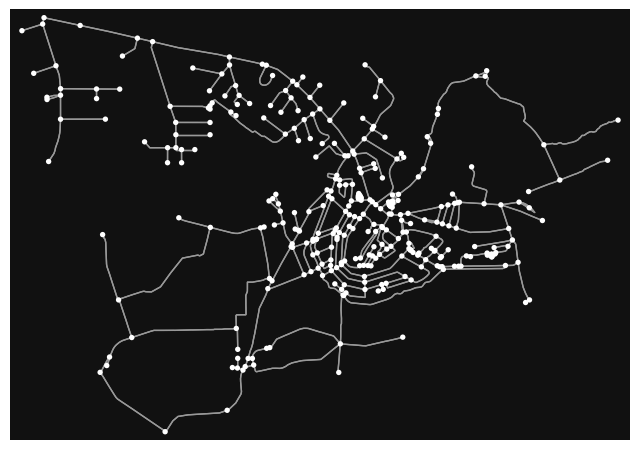

In [2]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
graph_water = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canal"]')
fig, ax = ox.plot_graph(graph_water)

In [3]:
node_id = list(graph_water.nodes)[0]
print(graph_water.nodes)

[46367195, 60739108, 60740168, 60740843, 60740852, 60742002, 117738457, 117738466, 117738475, 117738484, 117738490, 117738503, 117738509, 117908628, 117953816, 117953820, 154512118, 154515615, 154516859, 154538128, 154546029, 178249893, 178249922, 178261156, 178261159, 178261171, 178269153, 178287360, 237852499, 237852501, 237852504, 237852506, 251749021, 251764623, 251823620, 251823623, 251823628, 252100239, 252116496, 252116503, 252142901, 277138134, 277141215, 277141219, 277141224, 288315918, 288316157, 301390460, 301487539, 301492457, 304072208, 304072209, 304817737, 304820077, 304825773, 305081090, 305081097, 305082709, 305083121, 305084168, 305084619, 305085083, 305085205, 305085534, 305086630, 305086634, 305155547, 305155548, 305156166, 311306136, 311308968, 311319542, 322374080, 322375093, 323521776, 323525433, 323895952, 323901705, 323909108, 323909176, 323929882, 323968073, 323991338, 324010766, 324023636, 324089287, 324126395, 324128505, 324795591, 324795903, 324817669, 3248

In [5]:
swimming_routes_nodes = [46367195, 60739108, 60740168, 60740843, 60740852, 60742002, 117738457, 117738466, 117738475, 117738484, 117738490, 117738503, 117738509, 117908628, 117953816, 117953820, 154512118, 154515615, 154516859, 154538128, 154546029, 178249893, 178249922, 178261156, 178261159, 178261171, 178269153, 178287360, 237852499, 237852501, 237852504, 237852506, 251749021, 251764623, 251823620, 251823623, 251823628, 252100239, 252116496, 252116503, 252142901, 277138134, 277141215, 277141219, 277141224, 288315918, 288316157, 301390460, 301487539, 301492457, 304072208, 304072209, 304817737, 304820077, 304825773, 305081090, 305081097, 305082709, 305083121, 305084168, 305084619, 305085083, 305085205, 305085534, 305086630, 305086634, 305155547, 305155548, 305156166, 311306136, 311308968, 311319542, 322374080, 322375093, 323521776, 323525433, 323895952, 323901705, 323909108, 323909176, 323929882, 323968073, 323991338, 324010766, 324023636, 324089287, 324126395, 324128505, 324795591, 324795903, 324817669, 324817676, 324825417, 324827507, 324828382, 324835709, 324835775, 324835854, 324836147, 324836158, 324836453, 324836495, 324836597, 324836605, 324838382, 324840248, 324840257, 324840261, 324851885, 327758884, 327761512, 330205001, 330206044, 330206590, 330214571, 330214572, 330214574, 330215146, 330216334, 330218475, 330235877, 330236311, 330369915, 330684075, 331854233, 331864407, 331885655, 331960285, 358936552, 358936684, 358939606, 358942009, 359752535, 370883189, 375984099, 376934841, 376935014, 383994677, 383994680, 387790598, 387796642, 388561917, 391801194, 713491531, 730950175, 828573294, 1195429031, 1198078490, 1198078515, 1198238268, 1198238273, 1198238322, 1213243212, 1213618064, 2014599971, 2059958080, 2059958081, 2059984062, 2060036846, 2060036849, 2060036853, 2060036854, 2061548906, 2061548907, 2061548911, 2061548912, 2061548913, 2061550258, 2077024239, 2167126916, 2167126917, 2338700193, 2338700194, 2338700197, 2572173402, 2853837615, 2858742097, 2858742098, 2858742099, 2881858938, 2881858939, 2881858940, 2881858941, 2881858942, 2881858943, 2881858944, 2881858945, 2881860786, 2954758802, 3166216712, 3635344994, 3651658715, 3651658716, 3651658717, 3651658718, 3651658719, 3651658724, 3651663121, 3651666330, 3781170134, 3878490503, 3886312533, 4065802884, 4065802885, 4065802886, 4065802887, 4065802888, 4065804290, 4065804291, 4065804292, 4065804297, 4065804300, 4065804303, 4065804304, 4065804305, 4067013152, 4067013157, 4067013159, 4067013160, 4067013161, 4067013162, 4067013163, 4067013164, 4092309964, 4092309965, 4092309967, 4092309968, 4092309970, 4092309971, 4092309972, 4092309973, 4092309974, 4092309975, 4092309976, 4092309978, 4187137634, 4187137635, 4187137638, 4187137640, 4187137641, 4187137642, 4187137643, 4504566600, 4743131836, 4743131841, 4743402398, 5150348349, 5150348354, 5154210658, 5163755058, 5582809363, 5713701423, 5713701424, 5888218985, 6005864780, 6149763282, 7517762325, 7517762327, 7572774208, 7572774210, 7572774214, 7572774215, 7572774216, 7572774217, 7572774218, 7572774219, 7572774221, 7572774222, 7572774223, 7572774225, 7572774256, 7572774270, 7572774272, 7572774274, 7820221547, 7820292486, 7984605719, 8003741409, 8003741410, 8003741412, 8003741413, 8003741415, 8003741416, 8003741418, 8003741421, 8003741422, 8003741423, 8003741424, 8003741429, 8003741431, 8003741434, 8003741440, 8003759905, 8003759971, 8004333997, 8004333999, 8004334000, 8004334002, 8004334003, 8004334005, 8004334006, 8007041998, 8007041999, 8010131327, 8010131328, 8010131371, 8010131373, 8010136114, 8010136124, 8010136130, 8010136132, 8010136133, 8010136135, 8010136136, 8010136138, 8010136140, 8010136141, 8010136142, 8010136149, 8010136152, 8010136155, 8010811064, 8010811066, 8010811067, 8010811069, 8071739697, 8071739708, 8082388380, 8082388381, 8082388385, 8082388388, 8184636327, 8836980800, 9023526688, 9407684484, 10575340022, 11234564316]
subgraph=graph_water.subgraph(swimming_routes_nodes)

Use the centre to find a suitable spot for the Event Headquarters. - julian

Find the closest bus and tram stops at the start and finish of the swimming route. How many people can be transported within an hour. - Lora



Can you find which bus and tram lines these are, and can you find their routes? - Lora
maps amsterdam - has  a geojson of all metro, tram and bus in the area


Calculate the centrality of the start, finish, and centre node of the route. Which centrality calculatuon for non makes the most sense. See this link.

- Camille

Find all cafes, restaurants near the finish line. Walking me smaller than 10 minutes. - Camille